## Ridge and Lasso Regression

### Apply ML algorithms

- Linear Regression
- Lasso Regression
- Decision Tree Regressor
- KNN Regressor
- RandomForestRegressor
- Xgboost Regressor
- Huperparameter Tuning
- ANN- Artificial Neural Network

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Real_Combine.csv')

In [3]:
df.rename(columns={'T': 'Average_Temprature',
                   'TM': 'Temprature_Maximum',
                   'Tm': 'Temprature_Minimum',
                   'H': 'Average_Humidity',
                   'VV': 'Average_Visibility',
                   'V': 'Average_Wind_Speed',
                   'VM': 'Maximum_Wind_Speed',
                   'PM 2.5': 'PM_2.5_AQI'
                  },inplace = True)
df.head()

,Average_Temprature,Temprature_Maximum,Temprature_Minimum,Average_Humidity,Average_Visibility,Average_Wind_Speed,Maximum_Wind_Speed,PM_2.5_AQI
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


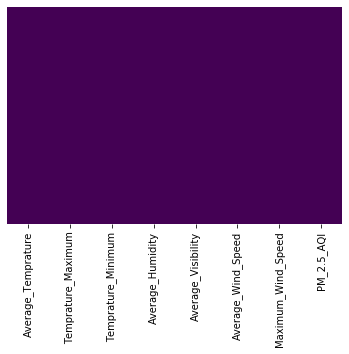

In [4]:
## Check for null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
df=df.dropna()

In [6]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

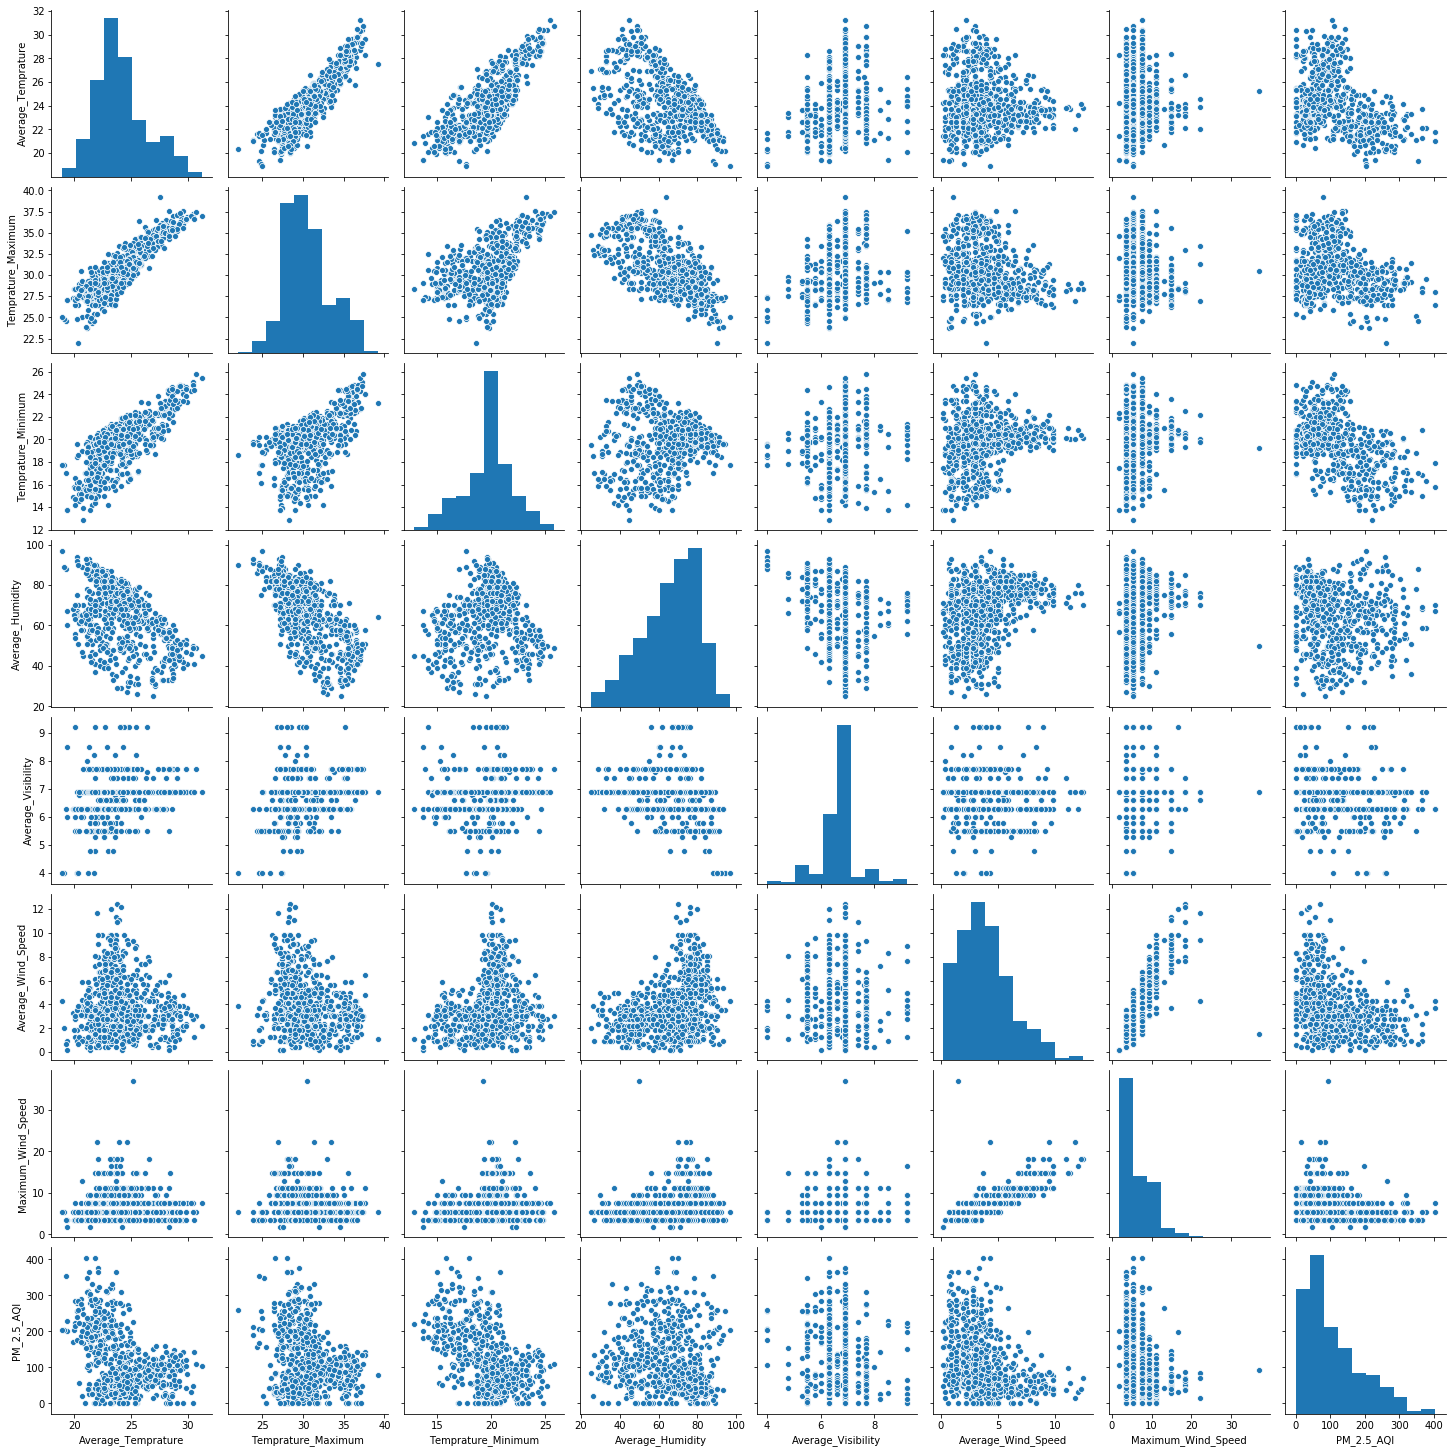

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,Average_Temprature,Temprature_Maximum,Temprature_Minimum,Average_Humidity,Average_Visibility,Average_Wind_Speed,Maximum_Wind_Speed,PM_2.5_AQI
Average_Temprature,1.000000,0.882433,0.772471,-0.479727,0.298138,-0.060587,-0.022747,-0.370754
Temprature_Maximum,0.882433,1.000000,0.512705,-0.659010,0.275448,-0.233228,-0.160021,-0.194339
Temprature_Minimum,0.772471,0.512705,1.000000,0.101630,0.102964,0.217269,0.196513,-0.519450
Average_Humidity,-0.479727,-0.659010,0.101630,1.000000,-0.282130,0.380803,0.299179,-0.189129
Average_Visibility,0.298138,0.275448,0.102964,-0.282130,1.000000,0.020445,0.007957,-0.138311
Average_Wind_Speed,-0.060587,-0.233228,0.217269,0.380803,0.020445,1.000000,0.792492,-0.402463
Maximum_Wind_Speed,-0.022747,-0.160021,0.196513,0.299179,0.007957,0.792492,1.000000,-0.339834
PM_2.5_AQI,-0.370754,-0.194339,-0.519450,-0.189129,-0.138311,-0.402463,-0.339834,1.000000


### Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.
Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)
Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

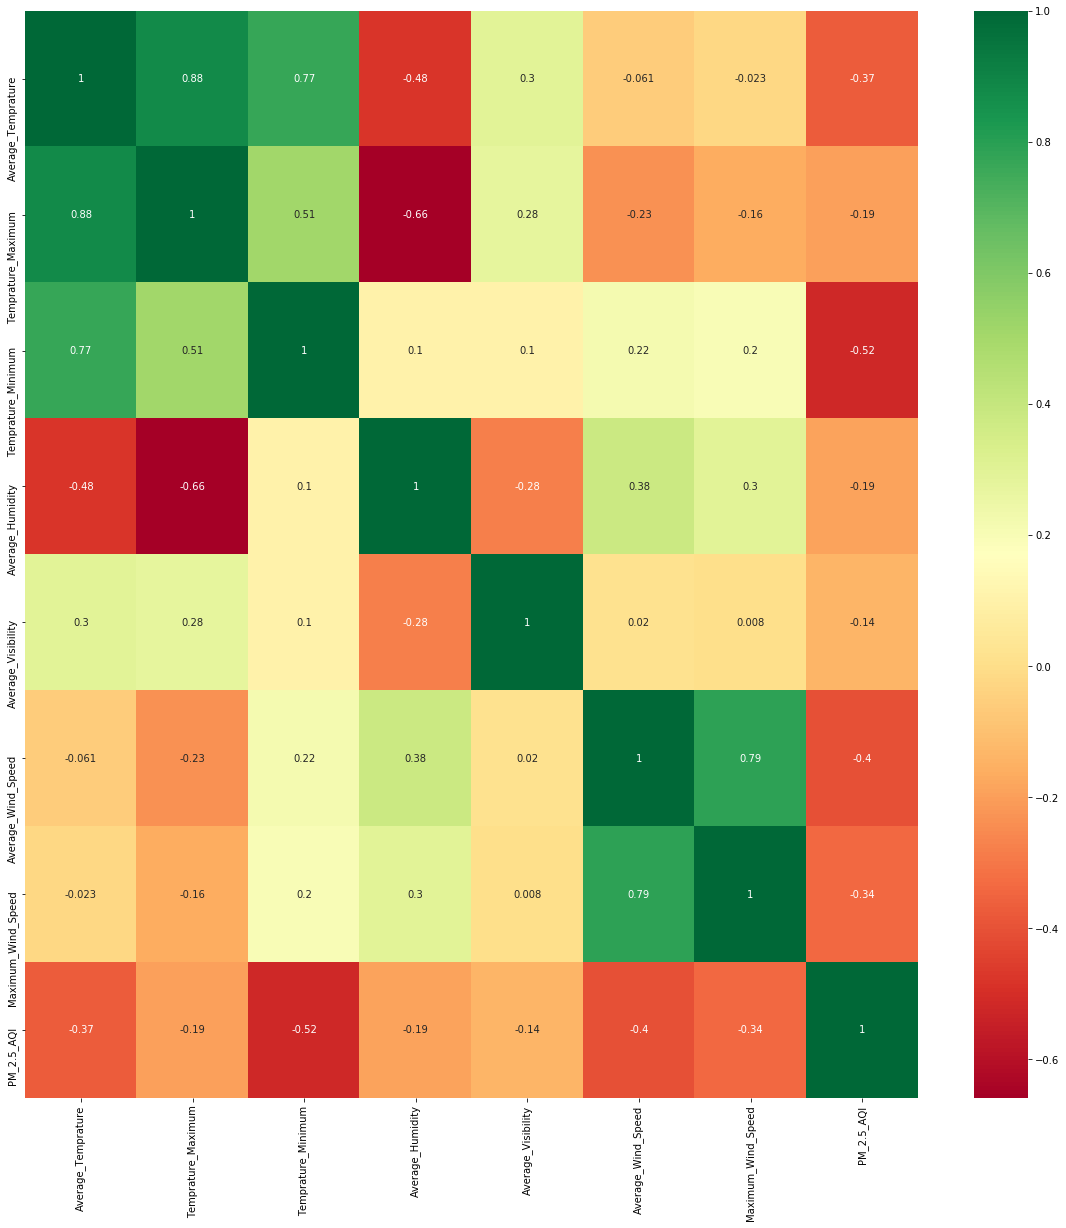

In [9]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
corrmat.index

Index(['Average_Temprature', 'Temprature_Maximum', 'Temprature_Minimum',
       'Average_Humidity', 'Average_Visibility', 'Average_Wind_Speed',
       'Maximum_Wind_Speed', 'PM_2.5_AQI'],
      dtype='object')

In [11]:
# df=df.drop(['Average_Temprature','Average_Wind_Speed'],axis = 1)
# df.corr()

In [12]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

### Feature Importance
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.
Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.
Feature importance is an inbuilt class that comes with Tree Based Regressor, we will be using Extra Tree Regressor for extracting the top 10 features for the dataset.

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [14]:
X.head()

,Average_Temprature,Temprature_Maximum,Temprature_Minimum,Average_Humidity,Average_Visibility,Average_Wind_Speed,Maximum_Wind_Speed
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4


In [15]:
print(model.feature_importances_)

[0.17822858 0.12141964 0.28903343 0.1066378  0.07290884 0.15814078
 0.07363093]


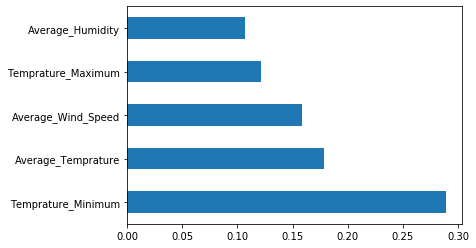

In [16]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

### Linear Regression

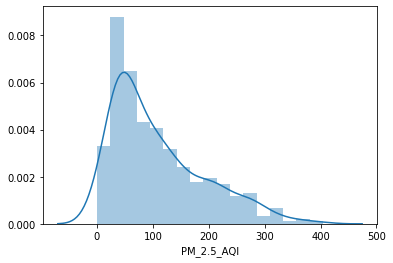

In [17]:
sns.distplot(y)

### Train Test split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Comparison Linear, Ridge and Lasso Regression

## Linear Regression

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [20]:
lin_regressor=LinearRegression()
mse=cross_val_score(lin_regressor,X,y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-4637.098693925595


## Ridge Regression

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [22]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [23]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-4625.463601277058


## Lasso Regression

In [24]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [25]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 5}
-4606.408747075294


#### Model Evaluation

In [26]:
prediction=lasso_regressor.predict(X_test)

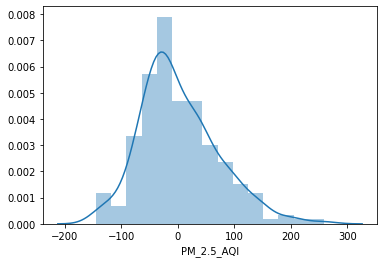

In [27]:
sns.distplot(y_test-prediction)

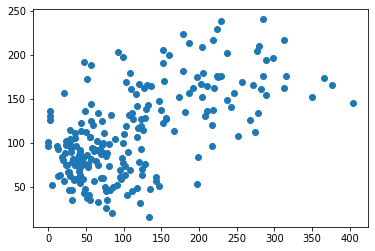

In [28]:
plt.scatter(y_test,prediction)

# Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [29]:
from sklearn import metrics

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 53.91902562319933
MSE: 4735.1805419065695
RMSE: 68.8126481245023


In [32]:
import pickle 
# open a file, where you ant to store the data
file = open('lasso_regression_model.pkl', 'wb')
# dump information to that file
pickle.dump(lasso_regressor, file)